In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
files = os.listdir('data/video_data')
files = [file for file in files if file != '1076_MTI_SAD_XX.flv']
len(files)

7441

In [3]:
files_audio = os.listdir('data/audio_data')
files_audio = [file for file in files_audio if file != '1076_MTI_SAD_XX.wav']
len(files_audio)

7441

In [4]:
speakers = []
emotions = []
for file in files:
    emo = file.split('_')[2]
    sp = file.split('_')[0]
    emotions.append(emo)
    speakers.append(sp)

In [5]:
counter = Counter(speakers)
speakers_num = len(list(counter.keys()))
print(f'Number of speakers: {speakers_num}')

Number of speakers: 91


In [6]:
from tabulate import tabulate

def statistic(counter):
    values = list(counter.values())

    val_sum = sum(values)
    speaker_mean = val_sum / len(values)
    maximum = max(values)
    minimum = min(values)
    data = [[round(speaker_mean, 2), maximum, minimum]]

    print('Number of files per speaker')
    print(tabulate(data, headers=["Mean", "Max", "Min"], tablefmt="grid"))


In [7]:
statistic(counter)

Number of files per speaker
+--------+-------+-------+
|   Mean |   Max |   Min |
+========+=======+=======+
|  81.77 |    82 |    76 |
+--------+-------+-------+


In [8]:
map_emotion = {
    'FEA': 'FEAR',
    'DIS': 'DISGUST',
    'ANG': 'ANGRY',
    'HAP': 'HAPPY',
    'SAD': 'SAD',
    'NEU': 'NEUTRAL'
}

In [9]:
emotions_df = pd.DataFrame({'emotion': emotions})
emotions_df['emotion'] = emotions_df['emotion'].map(map_emotion)

In [10]:
df = pd.DataFrame({
    'count': emotions_df['emotion'].value_counts(),
    'percent': emotions_df['emotion'].value_counts(normalize=True)
})

In [11]:
df

,count,percent
emotion,,
FEAR,1271,0.170810
DISGUST,1271,0.170810
ANGRY,1271,0.170810
HAPPY,1271,0.170810
SAD,1270,0.170676
NEUTRAL,1087,0.146083


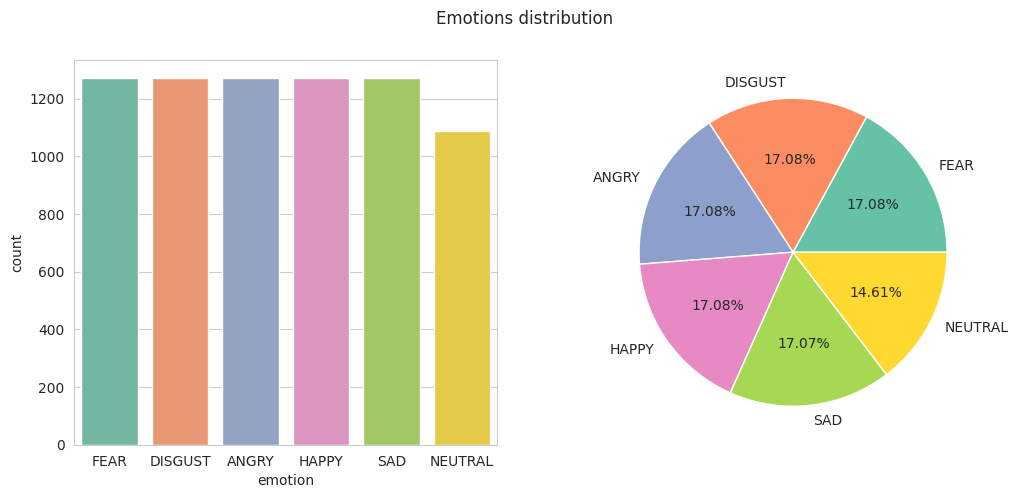

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(df, x='emotion', y='count', hue='emotion', ax=axes[0], palette='Set2')
axes[1].pie(df['count'], labels=df.index, autopct='%1.2f%%', colors=sns.color_palette('Set2'))
plt.suptitle('Emotions distribution')
plt.show()

In [13]:
actors = pd.read_csv("data/actors_meta.csv")
actors['Sex'].value_counts()

Sex
Male      48
Female    43
Name: count, dtype: int64